In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
column_names = session.query(Measurement).first()
column_names.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x116df353ef0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [11]:
station_column_names = session.query(Station).first()
station_column_names.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x116df409828>,
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain_data = session.query(Measurement.date,Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

In [13]:
# Calculate the date 1 year ago from today


In [14]:
# Perform a query to retrieve the data and precipitation scores


In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_data_df = pd.DataFrame(rain_data).set_index("date")
rain_data_df = rain_data_df.reset_index()

rain_data_df.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [16]:
# Sort the dataframe by date
rain_data_df = pd.DataFrame(rain_data_df.groupby("date")["prcp"].sum())
rain_data_df = rain_data_df.sort_values(by="date", ascending = False)

rain_data_df.head()

,prcp
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


In [17]:
date = rain_data_df.index

In [18]:
prcp = rain_data_df["prcp"]

<IPython.core.display.Javascript object>


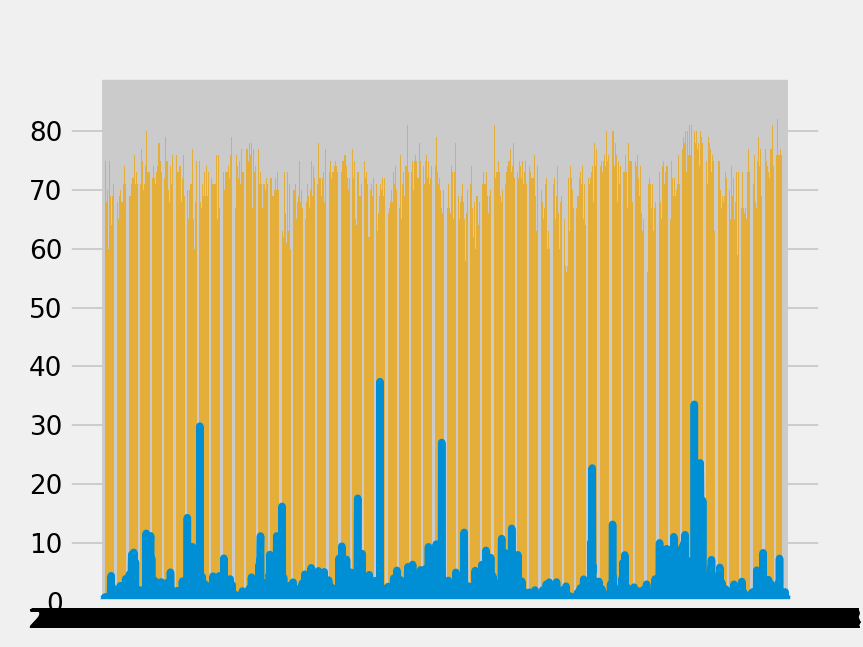

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(rain_data_df.index, rain_data_df)


plt.show()

In [20]:
# Rotate the xticks for the dates



In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data

summary_stats = rain_data_df.describe()
summary_stats

,prcp
count,2792.000000
mean,1.041594
std,2.224333
min,0.000000
25%,0.060000
50%,0.380000
75%,1.130000
max,37.410000


In [22]:
# How many stations are available in this dataset?

station_count = pd.DataFrame(session.query(Measurement.station).all())
station_count = station_count["station"].value_counts().count()
station_count

9

In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.

station_activity = pd.DataFrame(session.query(Measurement.station).all())
station_activity = pd.DataFrame(station_activity["station"].value_counts())
station_activity = station_activity.sort_values(by="station", ascending = False)
station_activity = station_activity.rename(columns={"station": "station count"}) 
station_activity

,station count
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

most_active = pd.DataFrame(session.query(Measurement.station, Measurement.tobs).all())
most_active = most_active[most_active["station"] == "USC00519281"]
most_active.head()

,station,tobs
12187,USC00519281,70.0
12188,USC00519281,62.0
12189,USC00519281,74.0
12190,USC00519281,75.0
12191,USC00519281,74.0


In [25]:
most_active_highest_temp = most_active["tobs"].max()
most_active_highest_temp

85.0

In [26]:
most_active_lowest_temp = most_active["tobs"].min()
most_active_lowest_temp

54.0

In [27]:
most_active_avg_temp = most_active["tobs"].mean()
most_active_avg_temp

71.66378066378067

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observ = pd.DataFrame(session.query(Measurement.station, Measurement.tobs).all())
temp_observ.head()

,station,tobs
0,USC00519397,65.0
1,USC00519397,63.0
2,USC00519397,74.0
3,USC00519397,76.0
4,USC00519397,73.0


In [29]:
temp_observ_count = pd.DataFrame(temp_observ.groupby("station")["tobs"].count())
temp_observ_count = temp_observ_count.sort_values(by="tobs", ascending = False)
temp_observ_count

,tobs
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [43]:
highest_temp_observ = temp_observ[temp_observ["station"] == "USC00519281"]
highest_temp_observ.head()

,station,tobs
12187,USC00519281,70.0
12188,USC00519281,62.0
12189,USC00519281,74.0
12190,USC00519281,75.0
12191,USC00519281,74.0


In [44]:
x_axis = np.arange(len(highest_temp_observ["station"]))
x_axis

array([   0,    1,    2, ..., 2769, 2770, 2771])

In [48]:
temp = highest_temp_observ["tobs"]
temp.head()

12187    70.0
12188    62.0
12189    74.0
12190    75.0
12191    74.0
Name: tobs, dtype: float64

In [47]:
plt.bar(x_axis, temp)



plt.show()

In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [36]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [40]:
# Plot the daily normals as an area plot with `stacked=False`
